In [1]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,roc_auc_score

In [2]:
#Loading the Dataset

df = pd.read_csv('^NSEI.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4855.700195,4481.549805,4837.549805,4837.549805,0
1,2007-09-24,4837.149902,5055.799805,4837.149902,5021.350098,5021.350098,0
2,2007-10-01,5021.500000,5261.350098,5001.350098,5185.850098,5185.850098,0
3,2007-10-08,5186.250000,5549.299805,5000.950195,5428.250000,5428.250000,0
4,2007-10-15,5428.350098,5736.799805,5101.750000,5215.299805,5215.299805,0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
834,2023-09-11,19890.000000,20222.449219,19865.349609,20192.349609,20192.349609,1541600
835,2023-09-18,20155.949219,20195.349609,19657.500000,19674.250000,19674.250000,1164500
836,2023-09-25,19678.199219,19766.650391,19492.099609,19638.300781,19638.300781,1193200
837,2023-10-02,19622.400391,19675.750000,19333.599609,19653.500000,19653.500000,892800
838,2023-10-09,19539.449219,19717.800781,19480.500000,19689.849609,19689.849609,381700


In [5]:
#Adding the next weeks close to the separate column for comparison
df['Next_Week'] = df['Adj Close'].shift(-1)

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Next_Week
0,2007-09-17,4518.450195,4855.700195,4481.549805,4837.549805,4837.549805,0,5021.350098
1,2007-09-24,4837.149902,5055.799805,4837.149902,5021.350098,5021.350098,0,5185.850098
2,2007-10-01,5021.500000,5261.350098,5001.350098,5185.850098,5185.850098,0,5428.250000
3,2007-10-08,5186.250000,5549.299805,5000.950195,5428.250000,5428.250000,0,5215.299805
4,2007-10-15,5428.350098,5736.799805,5101.750000,5215.299805,5215.299805,0,5702.299805


In [7]:
#Making the direction column 1 if Next_week's close is more than Adj 0 if Next Week's close is less than previous weeks close

df['Direction'] = (df['Next_Week'] > df['Adj Close']).astype('int')

In [8]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Next_Week,Direction
834,2023-09-11,19890.000000,20222.449219,19865.349609,20192.349609,20192.349609,1541600,19674.250000,0
835,2023-09-18,20155.949219,20195.349609,19657.500000,19674.250000,19674.250000,1164500,19638.300781,0
836,2023-09-25,19678.199219,19766.650391,19492.099609,19638.300781,19638.300781,1193200,19653.500000,1
837,2023-10-02,19622.400391,19675.750000,19333.599609,19653.500000,19653.500000,892800,19689.849609,1
838,2023-10-09,19539.449219,19717.800781,19480.500000,19689.849609,19689.849609,381700,NaN,0


In [9]:
df.shape

(839, 9)

In [10]:
#The ratio of the the rows to columns is healthy

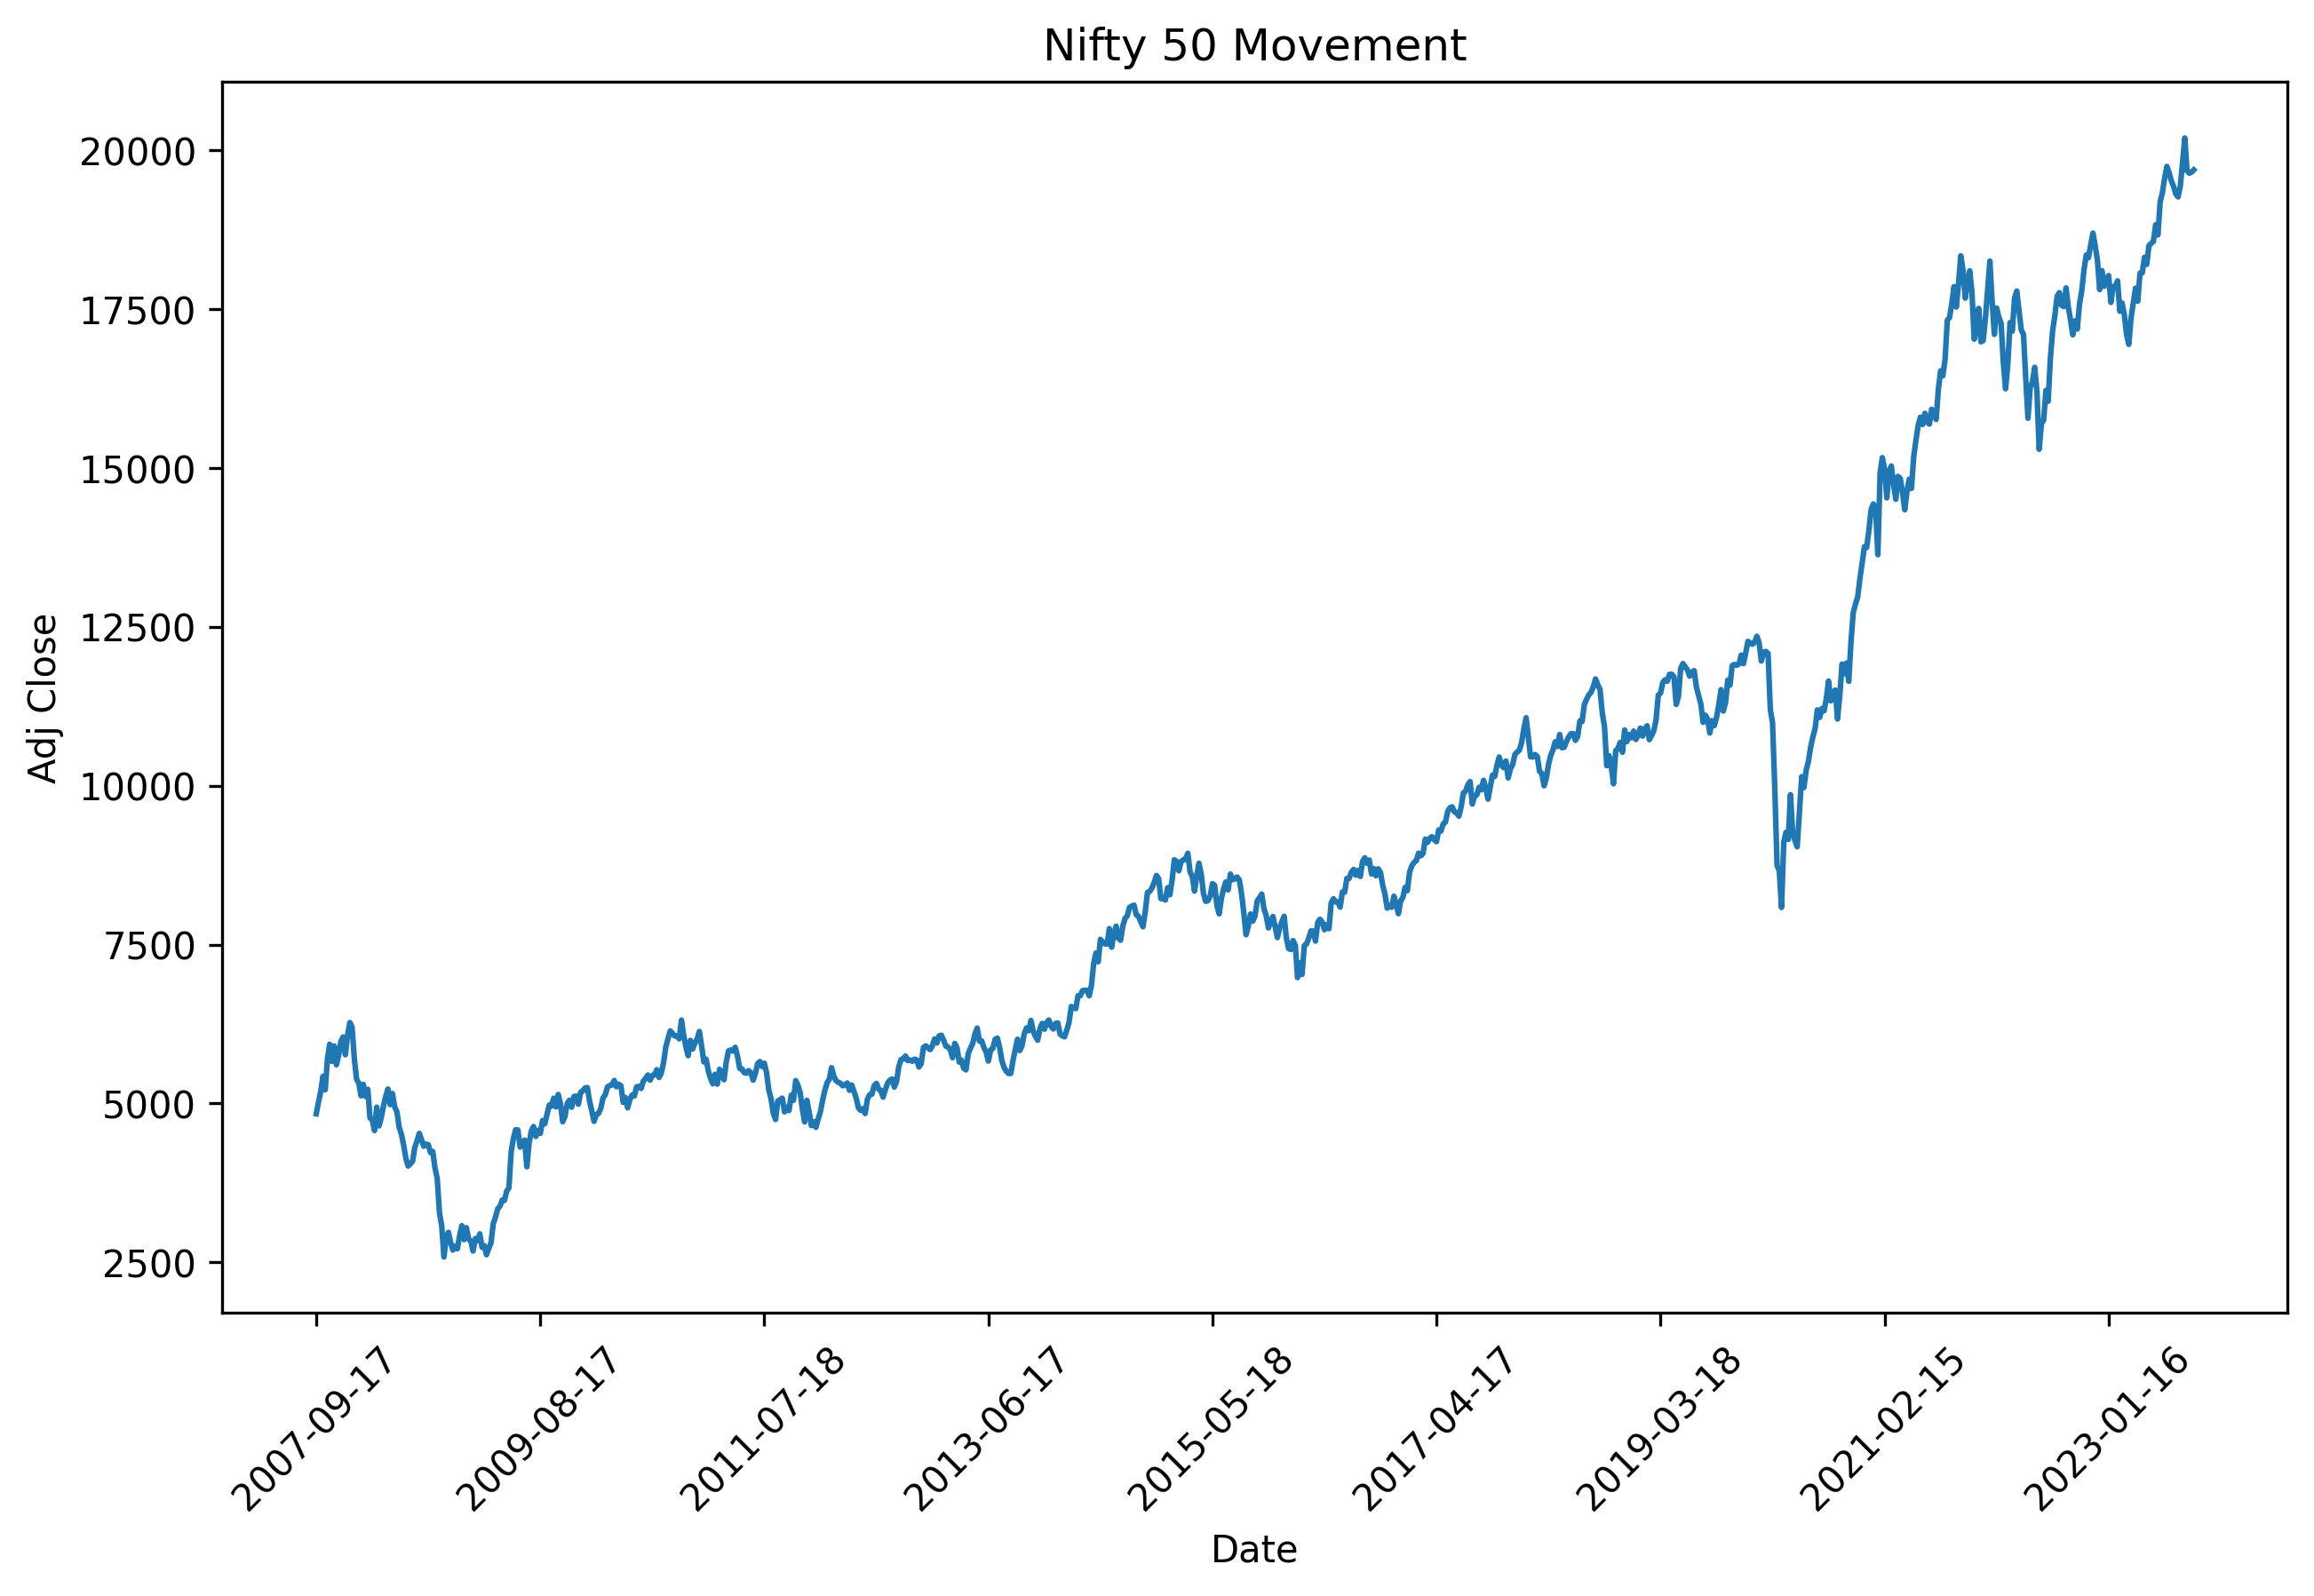

In [11]:
#Bivariate Analysis
plt.figure(figsize = (10,6),dpi = 300)
sns.lineplot(data  = df,x = 'Date',y = 'Adj Close')
plt.title('Nifty 50 Movement')
plt.xticks(range(0, len(df['Date']), 100), df['Date'][::100], rotation=45)
plt.show()

In [12]:
train = df.iloc[0:400]
train.head()
X_train = train[['Open','High','Low','Adj Close']]
y_train = train['Direction']

In [14]:
#Scaling the train and test data separately

from sklearn.preprocessing import MinMaxScaler

train_scaler = MinMaxScaler()
scaled_X_train = train_scaler.fit_transform(X_train)
scaled_X_train = pd.DataFrame(scaled_X_train,columns = X_train.columns,index = X_train.index)
scaled_X_train

,Open,High,Low,Adj Close
0,0.303716,0.333104,0.337871,0.354680
1,0.353746,0.364404,0.391778,0.383608
2,0.382686,0.396556,0.416669,0.409498
3,0.408549,0.441597,0.416609,0.447649
4,0.446555,0.470925,0.431889,0.414133
...,...,...,...,...
395,0.976123,0.956586,0.961700,0.947787
396,0.947403,0.921907,0.912682,0.900452
397,0.902152,0.877250,0.893187,0.880976
398,0.886375,0.880566,0.870812,0.882550


In [16]:
test = df.iloc[400:]
test

X_test = test[['Open','High','Low','Adj Close']]
y_test = test['Direction']

In [20]:
#Testing data Scaling

scaled_X_test = train_scaler.transform(X_test)
scaled_X_test = pd.DataFrame(scaled_X_test,columns = X_test.columns,index = X_test.index)
scaled_X_test

,Open,High,Low,Adj Close
400,0.894994,0.901510,0.912470,0.924643
401,0.919044,0.894370,0.912197,0.920661
402,0.915763,0.898006,0.879847,0.870462
403,0.869782,0.850439,0.862194,0.849719
404,0.848158,0.864165,0.862884,0.887814
...,...,...,...,...
834,2.716794,2.736769,2.669951,2.771332
835,2.758544,2.732530,2.638443,2.689789
836,2.683545,2.665473,2.613369,2.684132
837,2.674786,2.651254,2.589342,2.686524


In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(scaled_X_train,y_train)
y_pred_train = model_knn.predict(scaled_X_train)
train_precision = precision_score(y_train,y_pred_train)
y_pred_test = model_knn.predict(scaled_X_test)
test_precision  = precision_score(y_test,y_pred_test)

In [23]:
train_precision,test_precision

(0.7111111111111111, 0.5245901639344263)

In [24]:
#Knn Hyper Parameter Tuning

k_values = np.arange(1,30,2)
k_values
train_precision_values = []
test_precision_values = []
train_accuracy_values = []
test_accuracy_values = []
cv_precision_values = []
for k in k_values:
    model_knn = KNeighborsClassifier(n_neighbors = k)
    model_knn.fit(scaled_X_train,y_train)
    y_pred_train = model_knn.predict(scaled_X_train)
    train_precision_values.append(precision_score(y_train,y_pred_train))
    train_accuracy_values.append(accuracy_score(y_train,y_pred_train))

    y_pred_test = model_knn.predict(scaled_X_test)
    test_precision_values.append(precision_score(y_test,y_pred_test))
    test_accuracy_values.append(accuracy_score(y_test,y_pred_test))

In [25]:
train_precision_values

[1.0,
 0.7533632286995515,
 0.7111111111111111,
 0.6708333333333333,
 0.6751054852320675,
 0.6516393442622951,
 0.6352941176470588,
 0.6417322834645669,
 0.6385542168674698,
 0.6135458167330677,
 0.5925925925925926,
 0.5845588235294118,
 0.5818181818181818,
 0.5915492957746479,
 0.5902777777777778]

In [26]:
test_precision_values

[0.5344827586206896,
 0.4909090909090909,
 0.5245901639344263,
 0.5081967213114754,
 0.5081967213114754,
 0.5074626865671642,
 0.5303030303030303,
 0.5362318840579711,
 0.5131578947368421,
 0.5301204819277109,
 0.5720823798627003,
 0.5740318906605922,
 0.5740318906605922,
 0.5740318906605922,
 0.5740318906605922]

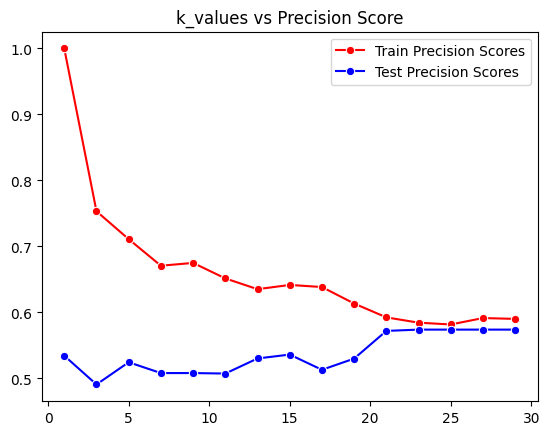

In [27]:
sns.lineplot(x = k_values,y = train_precision_values,label='Train Precision Scores',color = 'red',marker = 'o')
sns.lineplot(x = k_values,y = test_precision_values,label='Test Precision Scores',color = 'blue',marker = 'o')
plt.title("k_values vs Precision Score")
plt.show()

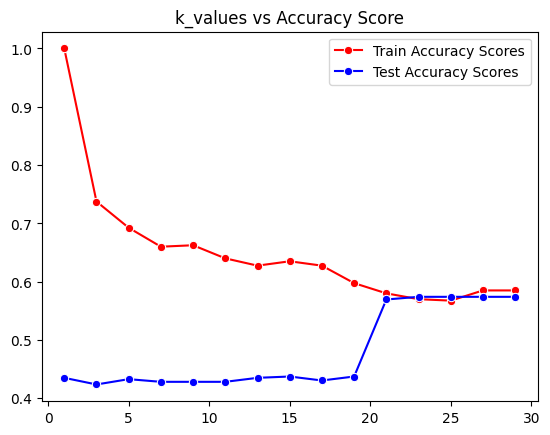

In [28]:
sns.lineplot(x = k_values,y = train_accuracy_values,label='Train Accuracy Scores',color = 'red',marker = 'o')
sns.lineplot(x = k_values,y = test_accuracy_values,label='Test Accuracy Scores',color = 'blue',marker = 'o')
plt.title("k_values vs Accuracy Score")
plt.show()

In [29]:
X_scaled = pd.concat([scaled_X_train,scaled_X_test],axis=0)
X_scaled
y = pd.concat([y_train,y_test],axis=0)
y

0      1
1      1
2      1
3      0
4      1
      ..
834    0
835    0
836    1
837    1
838    0
Name: Direction, Length: 839, dtype: int32

In [30]:
df_ROC_knn = pd.DataFrame(columns = ['Threshold','TP','FP','TN','FN','TPR','FPR'])

df_ROC_knn

,Threshold,TP,FP,TN,FN,TPR,FPR


In [31]:
#Threshold Tuning using max TPR-FPR
model_knn_tuned = KNeighborsClassifier(n_neighbors = 21)
model_knn_tuned.fit(X_scaled,y)
y_pred_prob = model_knn_tuned.predict_proba(X_scaled)[:,1]
y_pred_prob

threshold = np.arange(0,1.1,0.1)
for i in threshold:
    y_pred_tuned = (y_pred_prob > i).astype('int')
    cm = confusion_matrix(y,y_pred_tuned)
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]

    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)

    TPR = recall
    FPR = FP/(FP+TN)

    df_ROC_knn.loc[len(df_ROC_knn)] = pd.Series({'Threshold':i,'TP':TP,'FP':FP,'TN':TN,'FN':FN,'TPR':TPR,'FPR':FPR})
auc_score = roc_auc_score(y,y_pred_prob)

C:\Users\chall\AppData\Local\Temp\ipykernel_17560\3728407552.py:17: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP/(TP+FP)
C:\Users\chall\AppData\Local\Temp\ipykernel_17560\3728407552.py:17: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP/(TP+FP)


In [32]:
df_ROC_knn

,Threshold,TP,FP,TN,FN,TPR,FPR
0,0.0,470.0,369.0,0.0,0.0,1.000000,1.000000
1,0.1,470.0,369.0,0.0,0.0,1.000000,1.000000
2,0.2,470.0,369.0,0.0,0.0,1.000000,1.000000
3,0.3,470.0,369.0,0.0,0.0,1.000000,1.000000
4,0.4,447.0,333.0,36.0,23.0,0.951064,0.902439
5,0.5,355.0,244.0,125.0,115.0,0.755319,0.661247
6,0.6,187.0,90.0,279.0,283.0,0.397872,0.243902
7,0.7,53.0,20.0,349.0,417.0,0.112766,0.054201
8,0.8,17.0,3.0,366.0,453.0,0.036170,0.008130
9,0.9,0.0,0.0,369.0,470.0,0.000000,0.000000


In [33]:
df_ROC_knn['TPR-FPR'] = df_ROC_knn['TPR'] - df_ROC_knn['FPR']
df_ROC_knn

,Threshold,TP,FP,TN,FN,TPR,FPR,TPR-FPR
0,0.0,470.0,369.0,0.0,0.0,1.000000,1.000000,0.000000
1,0.1,470.0,369.0,0.0,0.0,1.000000,1.000000,0.000000
2,0.2,470.0,369.0,0.0,0.0,1.000000,1.000000,0.000000
3,0.3,470.0,369.0,0.0,0.0,1.000000,1.000000,0.000000
4,0.4,447.0,333.0,36.0,23.0,0.951064,0.902439,0.048625
5,0.5,355.0,244.0,125.0,115.0,0.755319,0.661247,0.094073
6,0.6,187.0,90.0,279.0,283.0,0.397872,0.243902,0.153970
7,0.7,53.0,20.0,349.0,417.0,0.112766,0.054201,0.058565
8,0.8,17.0,3.0,366.0,453.0,0.036170,0.008130,0.028040
9,0.9,0.0,0.0,369.0,470.0,0.000000,0.000000,0.000000


<Axes: xlabel='FPR', ylabel='TPR'>

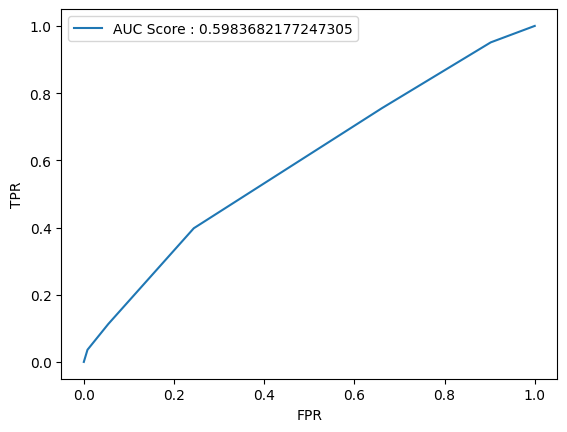

In [34]:
sns.lineplot(x = df_ROC_knn['FPR'],y = df_ROC_knn['TPR'],label = 'AUC Score : {}'.format(auc_score))

In [35]:
best_threshold = 0.6

In [37]:
y_pred_tuned = (y_pred_prob > best_threshold).astype('int')
cm_tuned = confusion_matrix(y,y_pred_tuned)
TP = cm_tuned[1,1]
TN = cm_tuned[0,0]
FP = cm_tuned[0,1]
FN = cm_tuned[1,0]

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)

TPR = recall
FPR = FP/(FP+TN)

In [38]:
print('KNearest Neighbors Performance Metrics')

print('-'*40)
print('Accuracy:',accuracy)
print('Misclassification:',1-accuracy)
print('Precision:',precision)
print('Recall:',recall)

print('TPR:',TPR)
print('FPR:',FPR)

KNearest Neighbors Performance Metrics
----------------------------------------
Accuracy: 0.5554231227651967
Misclassification: 0.4445768772348033
Precision: 0.6750902527075813
Recall: 0.39787234042553193
TPR: 0.39787234042553193
FPR: 0.24390243902439024


In [42]:
summary = pd.DataFrame(columns = ['Model','Accuracy Score','Precision','Recall','Misclassification'])
summary.loc[len(summary)] = pd.Series({'Model':'kNN Classifier','Accuracy Score':accuracy,'Precision':precision,'Recall':recall,'Misclassification':1-accuracy})
summary

,Model,Accuracy Score,Precision,Recall,Misclassification
0,kNN Classifier,0.555423,0.67509,0.397872,0.444577


### Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
model_dtr  = DecisionTreeClassifier(criterion = 'gini',random_state = 1)
model_dtr.fit(scaled_X_train,y_train)
y_pred_train_dtr = model_dtr.predict(scaled_X_train)
train_precision_score = precision_score(y_train,y_pred_train_dtr)
train_accuracy_score = accuracy_score(y_train,y_pred_train_dtr)

y_pred_test_dtr = model_dtr.predict(scaled_X_test)
test_precision_score = precision_score(y_test,y_pred_test_dtr)
test_accuracy_score = accuracy_score(y_test,y_pred_test_dtr)

In [44]:
train_accuracy_score

1.0

In [45]:
train_precision_score

1.0

In [46]:
test_precision_score

0.509090909090909

In [47]:
test_accuracy_score

0.428246013667426

In [48]:
#Tuning the Decision Tree classifier using gridsearchcv
from sklearn.metrics import make_scorer

In [49]:
parameters = {'splitter':['random','best'],
             'max_depth':[1,5,10,15,20,25,30,35,40,45,50,55,60,65],
             'min_samples_split':[2,5,10,15,20,25,30,35,40,45,50,55,65],
             'min_samples_leaf':[1,5,10,15,20,25,30,35,40,45],
             }

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
tuning_model = GridSearchCV(model_dtr,param_grid = parameters,cv=5,verbose= 0,scoring = make_scorer(precision_score))

In [52]:
tuning_model.fit(X_scaled,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                       55, 60, 65],
                         'min_samples_leaf': [1, 5, 10, 15, 20, 25, 30, 35, 40,
                                              45],
                         'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 35, 40,
                                               45, 50, 55, 65],
                         'splitter': ['random', 'best']},
             scoring=make_scorer(precision_score))

In [53]:
tuning_model.best_params_


{'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'splitter': 'random'}

In [54]:
tuning_model.best_score_


0.5964813085570044

In [55]:
model_dtr_tuned = DecisionTreeClassifier(splitter = 'random',max_depth = 10,min_samples_leaf = 10,min_samples_split = 2,random_state = 1,criterion='gini')

In [56]:
model_dtr_tuned.fit(scaled_X_train,y_train)
y_pred_train_dtr= model_dtr_tuned.predict(scaled_X_train)
tuned_train_precision_score = precision_score(y_train,y_pred_train_dtr)
tuned_train_accuracy_score = accuracy_score(y_train,y_pred_train_dtr)

y_pred_test_dtr = model_dtr_tuned.predict(scaled_X_test)
tuned_test_precision_score = precision_score(y_test,y_pred_test_dtr)
tuned_test_accuracy_score = accuracy_score(y_test,y_pred_test_dtr)

In [57]:
tuned_train_precision_score,tuned_test_precision_score

(0.6284584980237155, 0.5342465753424658)

In [58]:
tuned_train_accuracy_score,tuned_test_accuracy_score

(0.6175, 0.43735763097949887)

In [59]:
df_ROC_dtr = pd.DataFrame(columns = ['Threshold','TP','FP','TN','FN','TPR','FPR'])

df_ROC_dtr

,Threshold,TP,FP,TN,FN,TPR,FPR


In [60]:

#Threshold Tuning using max TPR-FPR
model_dtr_tuned.fit(X_scaled,y)
y_pred_prob_dtr = model_dtr_tuned.predict_proba(X_scaled)[:,1]
y_pred_prob_dtr

threshold = np.arange(0,1.1,0.1)
for i in threshold:
    y_pred_tuned_dtr = (y_pred_prob_dtr > i).astype('int')
    cm_dtr = confusion_matrix(y,y_pred_tuned_dtr)
    TP = cm_dtr[1,1]
    TN = cm_dtr[0,0]
    FP = cm_dtr[0,1]
    FN = cm_dtr[1,0]

    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)

    TPR = recall
    FPR = FP/(FP+TN)

    df_ROC_dtr.loc[len(df_ROC_dtr)] = pd.Series({'Threshold':i,'TP':TP,'FP':FP,'TN':TN,'FN':FN,'TPR':TPR,'FPR':FPR})
auc_score_dtr = round(roc_auc_score(y,y_pred_prob_dtr),2)

C:\Users\chall\AppData\Local\Temp\ipykernel_17560\1989817740.py:16: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP/(TP+FP)
C:\Users\chall\AppData\Local\Temp\ipykernel_17560\1989817740.py:16: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP/(TP+FP)


In [61]:
df_ROC_dtr

,Threshold,TP,FP,TN,FN,TPR,FPR
0,0.0,470.0,369.0,0.0,0.0,1.000000,1.000000
1,0.1,470.0,369.0,0.0,0.0,1.000000,1.000000
2,0.2,470.0,369.0,0.0,0.0,1.000000,1.000000
3,0.3,470.0,369.0,0.0,0.0,1.000000,1.000000
4,0.4,447.0,332.0,37.0,23.0,0.951064,0.899729
5,0.5,326.0,193.0,176.0,144.0,0.693617,0.523035
6,0.6,156.0,66.0,303.0,314.0,0.331915,0.178862
7,0.7,79.0,26.0,343.0,391.0,0.168085,0.070461
8,0.8,18.0,4.0,365.0,452.0,0.038298,0.010840
9,0.9,0.0,0.0,369.0,470.0,0.000000,0.000000


<Axes: xlabel='FPR', ylabel='TPR'>

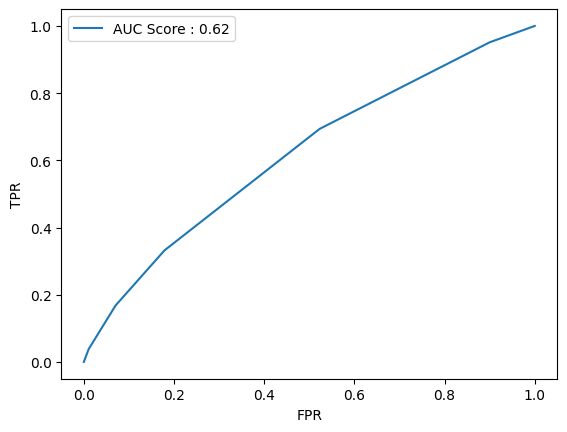

In [62]:
sns.lineplot(x = df_ROC_dtr['FPR'],y = df_ROC_dtr['TPR'],label = 'AUC Score : {}'.format(auc_score_dtr))

In [63]:
df_ROC_dtr['TPR-FPR']  = df_ROC_dtr['TPR'] - df_ROC_dtr['FPR']

In [64]:
df_ROC_dtr

,Threshold,TP,FP,TN,FN,TPR,FPR,TPR-FPR
0,0.0,470.0,369.0,0.0,0.0,1.000000,1.000000,0.000000
1,0.1,470.0,369.0,0.0,0.0,1.000000,1.000000,0.000000
2,0.2,470.0,369.0,0.0,0.0,1.000000,1.000000,0.000000
3,0.3,470.0,369.0,0.0,0.0,1.000000,1.000000,0.000000
4,0.4,447.0,332.0,37.0,23.0,0.951064,0.899729,0.051335
5,0.5,326.0,193.0,176.0,144.0,0.693617,0.523035,0.170582
6,0.6,156.0,66.0,303.0,314.0,0.331915,0.178862,0.153053
7,0.7,79.0,26.0,343.0,391.0,0.168085,0.070461,0.097624
8,0.8,18.0,4.0,365.0,452.0,0.038298,0.010840,0.027458
9,0.9,0.0,0.0,369.0,470.0,0.000000,0.000000,0.000000


In [66]:
y_pred_tuned_dtr = (y_pred_prob_dtr > 0.5).astype('int')
cm_dtr_tuned = confusion_matrix(y,y_pred_tuned_dtr)
TP = cm_dtr_tuned[1,1]
TN = cm_dtr_tuned[0,0]
FP = cm_dtr_tuned[0,1]
FN = cm_dtr_tuned[1,0]

accuracy = (TP+TN)/(TP+TN+FP+FN)
misclassification = 1-accuracy
precision = TP/(TP+FP)
recall = TP/(TP+FN)

TPR = recall
FPR = FP/(FP+TN)

In [67]:
print("Decision Tree Performance Metrics")

print('-'*40)
print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('TPR:',TPR)
print('FPR:',FPR)

Decision Tree Performance Metrics
----------------------------------------
Accuracy: 0.5983313468414779
Precision: 0.628131021194605
Recall: 0.6936170212765957
TPR: 0.6936170212765957
FPR: 0.5230352303523035


In [68]:
summary

,Model,Accuracy Score,Precision,Recall,Misclassification
0,kNN Classifier,0.555423,0.67509,0.397872,0.444577


In [69]:
summary.loc[len(summary)] = pd.Series({'Model':'Decision tree Classifier','Accuracy Score':accuracy,'Precision':precision,'Recall':recall,'Misclassification':1-accuracy})
summary

,Model,Accuracy Score,Precision,Recall,Misclassification
0,kNN Classifier,0.555423,0.67509,0.397872,0.444577
1,Decision tree Classifier,0.598331,0.628131,0.693617,0.401669
